# Sentiment Prediction Model

In [1]:
import pandas as pd
import numpy as np
from matplotlib import (mlab, pyplot as plt)
from IPython.display import display, Markdown

from sentiment_analysis import (database as db, entities as et, util)

def plot_results(actual, expected):
    display(Markdown("### RMSE: %.5f" % util.rmse(actual, expected)))
    plt.title('Predicted (green) vs Desired (red)')
    plt.ylabel('Accuracy')
    plt.xlabel('Rating')
    plt.scatter(actual, expected, color=util.green, alpha=0.5)
    plt.plot([0, 10], [0, 10], color='red')
    plt.show()
    plt.title('Predicted (green) vs Actual (red)')
    plt.ylabel('Review Count')
    plt.xlabel('Rating')
    plt.hist(actual, 40, facecolor=util.green)
    plt.hist(expected, 40, facecolor='red', alpha=0.5)
    plt.show()

In [2]:
onehot = et.SigWordUse.onehot()
train, test = onehot.iloc[:,3:], onehot['_rating']
sw = pd.read_sql_table('sig_word', db.engine)
weights = pd.Series(sw.median_q50.values, index=sw.word).sort_index()

### RMSE: 1.40545

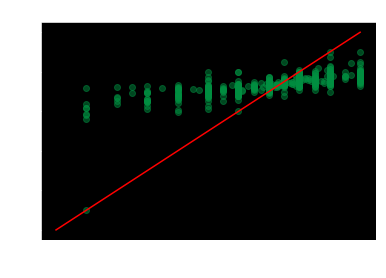

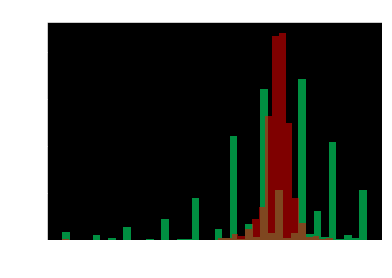

In [3]:
Qone = train.multiply(weights)
N_total = train.sum(axis=1)
predictions = Qone.sum(axis=1) / N_total
util.rmse(test, predictions)
plot_results(test, predictions)

# Scaling Coeffecients

## Method 1: Scale distance from median

### RMSE: 1.21360

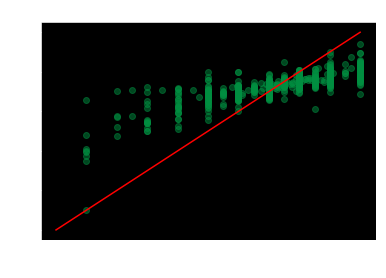

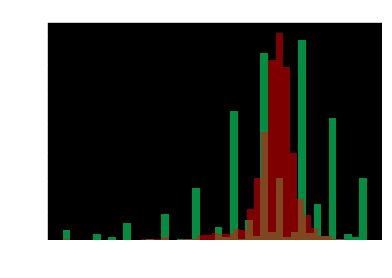

In [4]:
alpha = abs(weights - 7.5) + 1
Qone_scaled = Qone.multiply(alpha, axis=1)
N_total = train.multiply(alpha, axis=1).sum(axis=1)
predictions = Qone_scaled.sum(axis=1) / N_total
plot_results(test, predictions)

## Method 2: Scale linear multiplicative

(includes Method 1)

In [6]:
multiplers = []
for multipler in range(0, 1001, 10):
    if multipler == 0:
        continue
    alpha = multipler * abs(weights - 7.5) + 1
    Qone_scaled = Qone.multiply(alpha, axis=1)
    N_total = train.multiply(alpha, axis=1).sum(axis=1)
    predictions = Qone_scaled.sum(axis=1) / N_total
    rmse = util.rmse(test, predictions)
    multiplers.append([multipler, rmse])
multipler_df = pd.DataFrame(multiplers, columns=['multipler', 'rmse'])
multipler_df.nsmallest(1, 'rmse')

,multipler,rmse
99,1000,1.025913


### RMSE: 1.02591

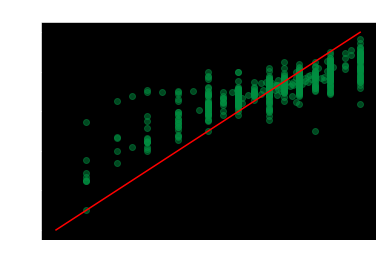

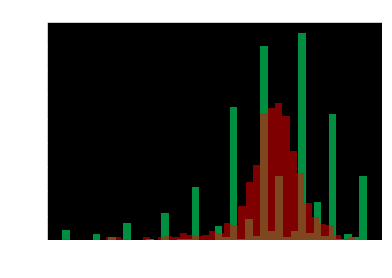

In [7]:
multipler = 1000
alpha = multipler * abs(weights - 7.5) + 1
Qone_scaled = Qone.multiply(alpha, axis=1)
N_total = train.multiply(alpha, axis=1).sum(axis=1)
predictions = Qone_scaled.sum(axis=1) / N_total
plot_results(test, predictions)

## Method 3: Power scaling

(includes method 1)

In [8]:
powers = []
for power in [1, 1.2, 1.4, 1.6, 1.8, 2, 2.5, 3, 3.5, 4, 4.5, 5]:
    alpha = abs(weights - 7.5)**power + 1
    Qone_scaled = Qone.multiply(alpha, axis=1)
    N_total = train.multiply(alpha, axis=1).sum(axis=1)
    predictions = Qone_scaled.sum(axis=1) / N_total
    rmse = util.rmse(test, predictions)
    powers.append([power, rmse])
powers_df = pd.DataFrame(powers, columns=['power', 'rmse'])
powers_df.nsmallest(1, 'rmse')

,power,rmse
7,3.0,0.997201


### RMSE: 0.99720

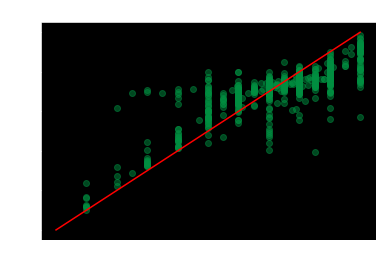

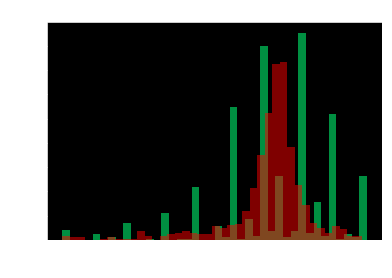

In [9]:
power = 3
alpha = abs(weights - 7.5)**power + 1
Qone_scaled = Qone.multiply(alpha, axis=1)
N_total = train.multiply(alpha, axis=1).sum(axis=1)
predictions = Qone_scaled.sum(axis=1) / N_total
plot_results(test, predictions)

## Combining Methods 1, 2, and 3

In [10]:
multiplers = [1, 10, 100, 1000]
powers = [1, 1.2, 1.4, 1.6, 1.8, 2, 2.5, 3, 3.5, 4, 4.5, 5]
combinations = []
for multipler in multiplers:
    for power in powers:
        alpha = multipler * abs(weights - 7.5)**power + 1
        Qone_scaled = Qone.multiply(alpha, axis=1)
        N_total = train.multiply(alpha, axis=1).sum(axis=1)
        predictions = Qone_scaled.sum(axis=1) / N_total
        combinations.append([multipler, power, util.rmse(test, predictions)])
combinations_df = pd.DataFrame(combinations, columns=['multipler', 'power', 'rmse'])
combinations_df.nsmallest(1, 'rmse')

,multipler,power,rmse
40,1000,1.8,0.934492


### RMSE: 0.93449

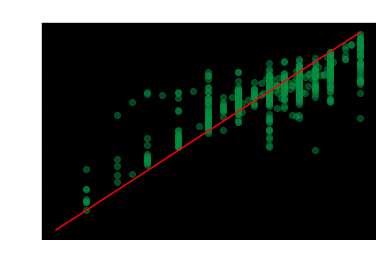

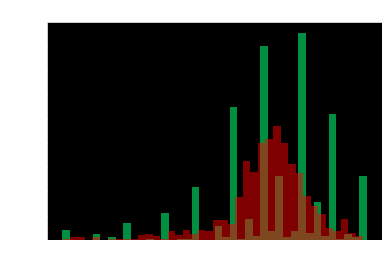

In [11]:
multipler = 1000
power = 1.8
alpha = multipler * abs(weights - 7.5)**power + 1
Qone_scaled = Qone.multiply(alpha, axis=1)
N_total = train.multiply(alpha, axis=1).sum(axis=1)
predictions = Qone_scaled.sum(axis=1) / N_total
plot_results(test, predictions)